<a href="https://colab.research.google.com/github/Shinde-iru1920/images/blob/main/Real_ESRGAN_Image_and_Video_Upscaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# @title
# Clone Real-ESRGAN and enter the Real-ESRGAN
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN
# Set up the environment
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install ffmpeg-python
!pip install -r requirements.txt
!python setup.py develop

from IPython.display import HTML
from base64 import b64encode

def show_video(video_path, video_width = 720):

  video_file = open(video_path, "r+b").read()

  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 759, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 759 (delta 106), reused 98 (delta 98), pack-reused 638 (from 1)
Receiving objects: 100% (759/759), 5.38 MiB | 37.72 MiB/s, done.
Resolving deltas: 100% (415/415), done.
/content/Real-ESRGAN
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 4.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-

In [5]:
import os
import subprocess

# Define the path to the file
# Use pip show to find the installation location of basicsr
try:
    # Run pip show basicsr and capture the output
    result = subprocess.run(['pip', 'show', 'basicsr'], capture_output=True, text=True, check=True)
    # Find the 'Location:' line in the output
    for line in result.stdout.splitlines():
        if line.startswith('Location:'):
            package_location = line.split(': ')[1].strip()
            break
    else:
        raise Exception("Could not find installation location for basicsr")

    # Construct the file path using the found location
    file_path = os.path.join(package_location, 'basicsr', 'data', 'degradations.py')
    print(f"Constructed file path: {file_path}")

except Exception as e:
    print(f"Error finding basicsr installation location: {e}")
    # Exit or handle the error appropriately
    exit()


# Check if the file exists before attempting to open it
if not os.path.exists(file_path):
    print(f"Error: File not found at the constructed path: {file_path}")
    # Exit or handle the error appropriately
    exit()

# Read the content of the file
with open(file_path, 'r') as file:
    file_data = file.readlines()

# Modify the specific line
modified = False
for i, line in enumerate(file_data):
    if 'from torchvision.transforms.functional_tensor import rgb_to_grayscale' in line:
        file_data[i] = 'from torchvision.transforms.functional import rgb_to_grayscale\n'
        modified = True
        break

if modified:
    # Write the modified content back to the file
    with open(file_path, 'w') as file:
        file.writelines(file_data)
    print("Modification applied successfully.")
else:
    print("Target line not found in the file. No modification applied.")

Constructed file path: /usr/local/lib/python3.11/dist-packages/basicsr/data/degradations.py
Modification applied successfully.


In [16]:
import os

# Settings
input_folder = "/content/drive/MyDrive/Manga/c145"
model = "RealESRGAN_x4plus_anime_6B"
scale = 2
face_enhance = False
code = "inference_realesrgan.py"

# Get all image files in the folder
image_extensions = (".png", ".jpg", ".jpeg", ".webp")
input_files = [f for f in os.listdir(input_folder) if f.lower().endswith(image_extensions)]

print(f"Found {len(input_files)} image(s). Starting batch processing...")

for filename in input_files:
    input_path = os.path.join(input_folder, filename)

    # Generate output path (same folder, "_out" suffix)
    filename_wo_ext, ext = os.path.splitext(filename)
    result_path = os.path.join(input_folder, filename_wo_ext + "_out" + ext)

    # Build command
    if face_enhance:
        command = f"python {code} -i '{input_path}' -n {model} -o '{input_folder}' -s {scale} --face_enhance"
    else:
        command = f"python {code} -i '{input_path}' -n {model} -o '{input_folder}' -s {scale}"

    print(f"Processing: {filename}")
    os.system(command)


Found 18 image(s). Starting batch processing...
Processing: 008.jpg
Processing: 006.jpg
Processing: 007.jpg
Processing: 011.jpg
Processing: 003.jpg
Processing: 010.jpg
Processing: 005.jpg
Processing: 002.jpg
Processing: 009.jpg
Processing: 001.jpg
Processing: 004.jpg
Processing: 016.jpg
Processing: 015.jpg
Processing: 017.jpg
Processing: 012.jpg
Processing: 014.jpg
Processing: 013.jpg
Processing: 018.jpg


Processed (19/19): 019.jpg


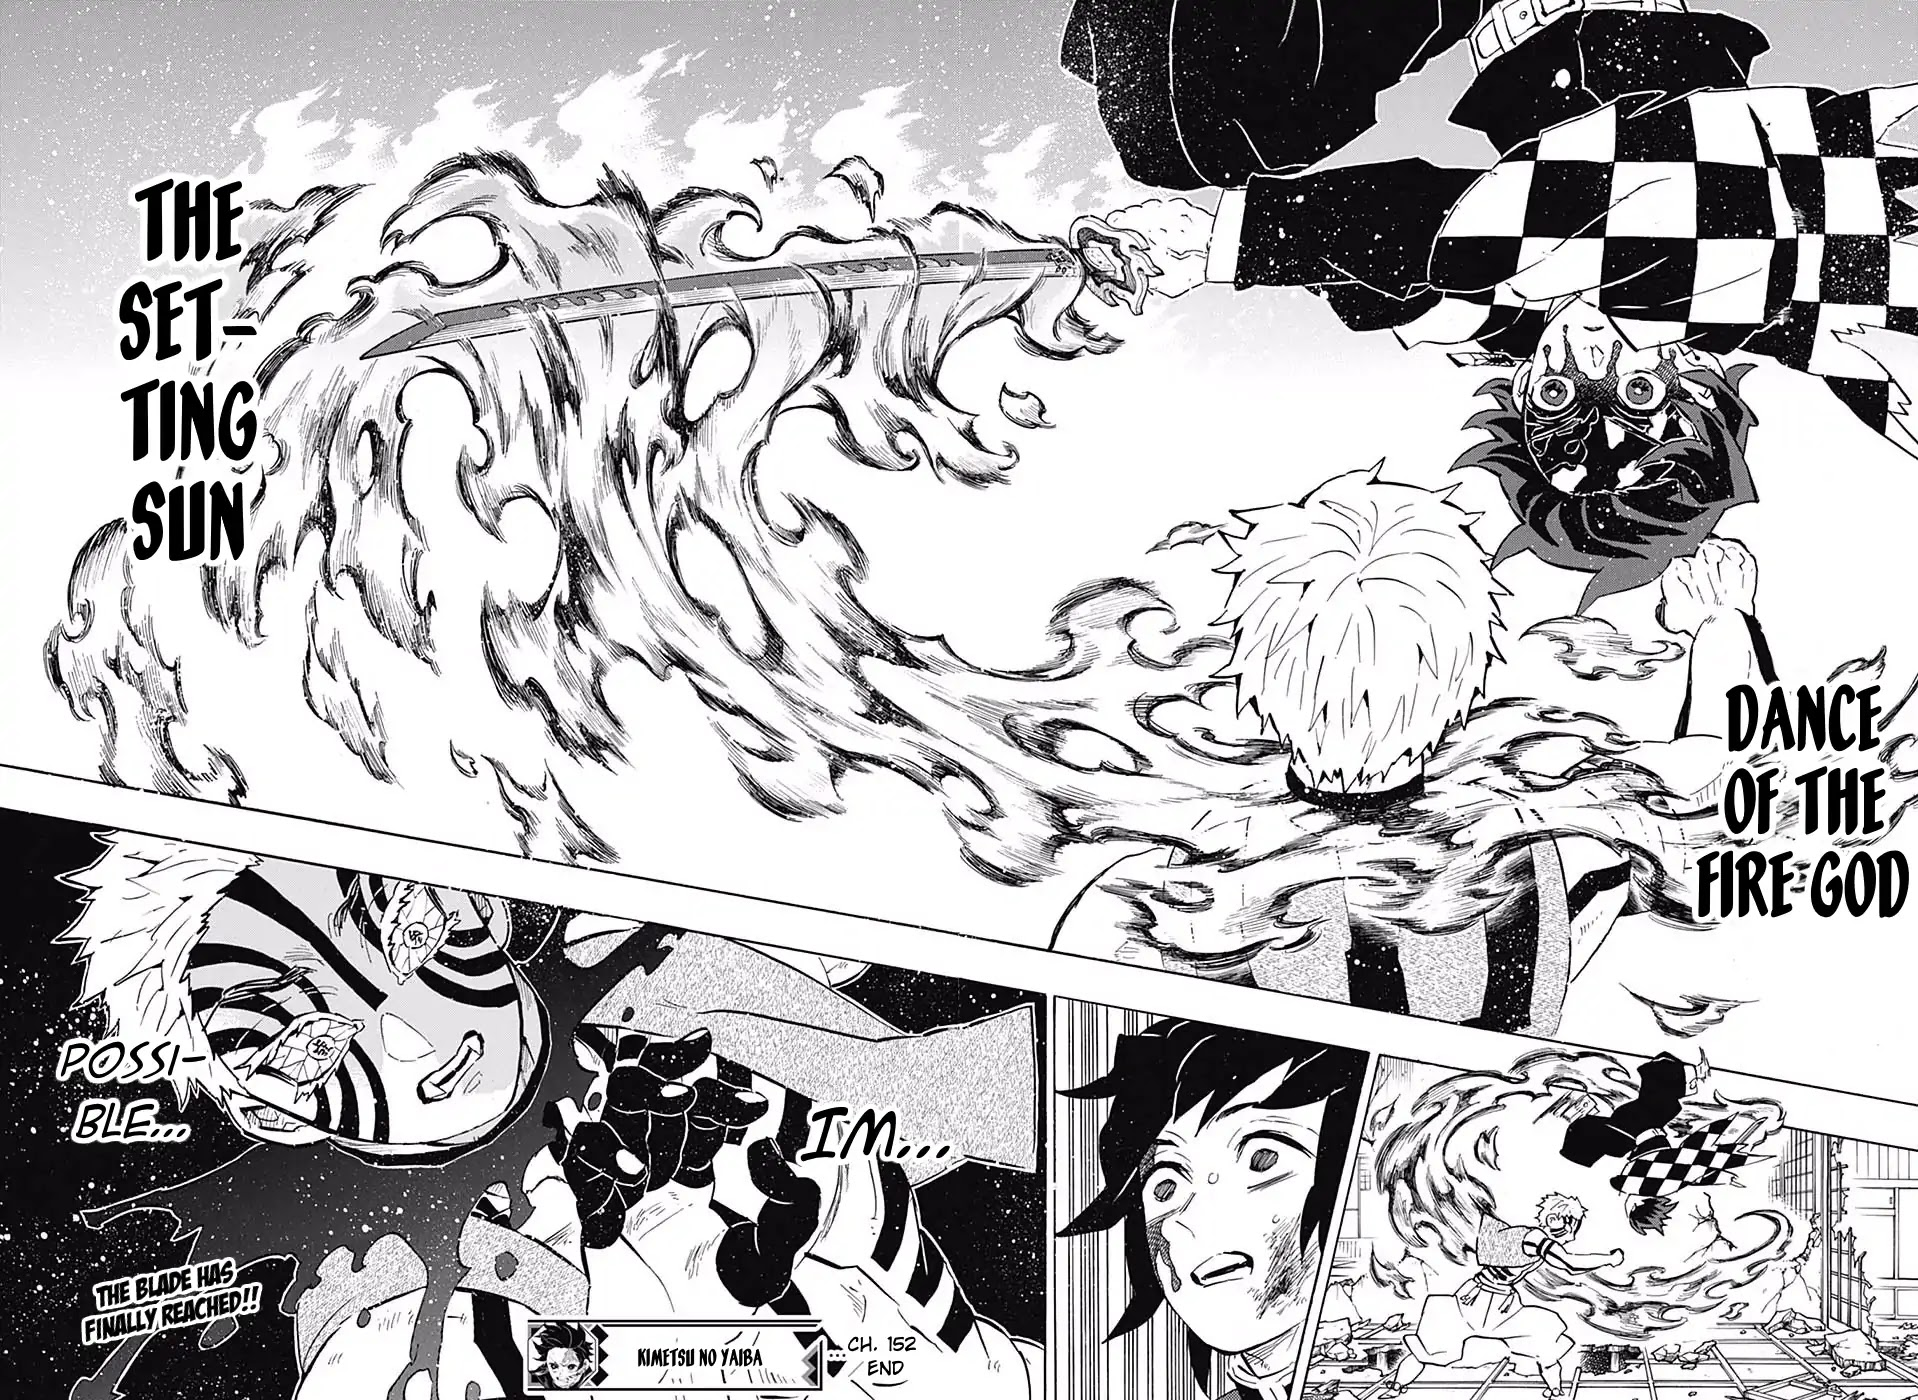

Output image not found!


In [18]:
import os
import subprocess
import time

input_folder = "/content/Real-ESRGAN/inputs" # @param {type:"string"}
output_folder = "/content/Real-ESRGAN/outputs" # @param {tupe:"seting"}
model = "RealESRGAN_x4plus_anime_6B" # @param ["RealESRGAN_x4plus", "RealESRGAN_x2plus", "RealESRNet_x4plus", "official ESRGAN_x4", "realesr-general-x4v3", "RealESRGAN_x4plus_anime_6B", "realesr-animevideov3"]
scale = 2 # @param {type:"slider", min:1, max:4, step:1}
face_enhance = False # @param {type:"boolean"}
code = "inference_realesrgan.py"

os.makedirs(output_folder, exist_ok=True)

image_extensions = (".png", ".jpg", ".jpeg", ".webp")
input_files = [f for f in os.listdir(input_folder) if f.lower().endswith(image_extensions)]

print(f"Found {len(input_files)} image(s). Starting batch processing...")

for i, filename in enumerate(input_files, 1):
    input_path = os.path.join(input_folder, filename)

    if face_enhance:
        command = f"python {code} -i '{input_path}' -n {model} -o '{output_folder}' -s {scale} --face_enhance"
    else:
        command = f"python {code} -i '{input_path}' -n {model} -o '{output_folder}' -s {scale}"

    print(f"Processing ({i}/{len(input_files)}): {filename}")

    subprocess.run(command, shell=True, check=True)

    print(f"Processed ({i}/{len(input_files)}): {filename}")

    time.sleep(0.5)  # Optional, to avoid overloading system


In [14]:
# === User-configurable parameters ===

input_folder = "/content/Real-ESRGAN/inputs"  # @param {type:"string"}
output_folder = "/content/Real-ESRGAN/outputs"  # @param {type:"string"}

model = "RealESRGAN_x4plus_anime_6B"  # @param ["RealESRGAN_x4plus", "RealESRGAN_x2plus", "RealESRNet_x4plus", "official ESRGAN_x4", "realesr-general-x4v3", "RealESRGAN_x4plus_anime_6B", "realesr-animevideov3"]

scale = 2  # @param {type:"slider", min:1, max:4, step:1}
face_enhance = False  # @param {type:"boolean"}


Testing 0 00003
